## Ej1

### a) Diez primeros números de la secuencia de Von Neumann

In [15]:
from functools import reduce


def middlesquare(u):
    return ((u**2) // 100) % 10_000

print(middlesquare(1004))

def diez_primeros(u):
    r = []

    u_next = u

    for _ in range(0, 10):
        yield middlesquare(u_next)
        u_next = middlesquare(u_next)

incisos = [3792, 1004, 2100, 1234]


for index, seed in enumerate(incisos):
    print(f"{index}) {seed}: ", list(diez_primeros(seed)))



80
0) 3792:  [3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792]
1) 1004:  [80, 64, 40, 16, 2, 0, 0, 0, 0, 0]
2) 2100:  [4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100]
3) 1234:  [5227, 3215, 3362, 3030, 1809, 2724, 4201, 6484, 422, 1780]


### b) Calcular los diez primeros elementos de la secuencia generada por el generador congruencial



In [14]:
import itertools


def gen(y0, a, c, M):
    yk = y0

    while True:

        yk1 = (a*yk + c ) % (M)

        yield yk1

        yk = yk1

y0, a, c, M = 4, 5, 4, 32


g = gen(y0, a, c, M)

sample = list(itertools.islice(g, 10))

print(f"y0 = 4 : {sample}")

y0 = 50

g = gen(y0, a, c, M)

sample = list(itertools.islice(g, 10))

print(f"y0 = 50 : {sample}")




y0 = 4 : [24, 28, 16, 20, 8, 12, 0, 4, 24, 28]
y0 = 50 : [30, 26, 6, 2, 14, 10, 22, 18, 30, 26]


- Caso y0 = 4, el periodo es de 8
- Caso y0 = 50, el periodo también es de 8

### c)

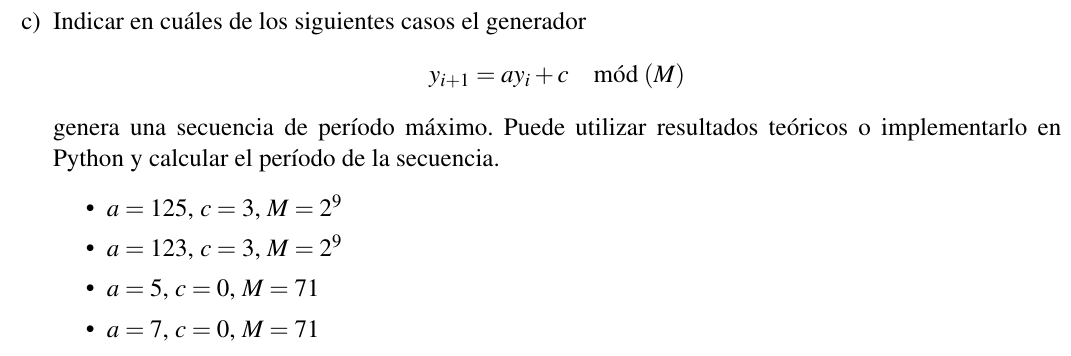

K = M (periodo es máximo) si y sólo si:

- c y M son coprimos
- a = 1 mod p, para algún p primo tq p | M
- 4 |/ M ó a = 1 mod 4


**a = 125, c = 3, M = 2^9**

c y M son coprimos :D

a = 1 mod 2, y 2 divide M :D

a = 1 mod 4 :D

Periodo máximo

**a = 123, c = 3, M = 2^9**

a = 3 mod 4 D:

Periodo no máximo

**a = 5, c = 0, M = 71**
**a = 5, c = 0, M = 71**

En ninguno de estos casos puede K = M, pues c = 0 y por lo tanto en el mejor caso tenemos que K <= M-1

## 2

a) haciendo la integral múltiple para w1 + w2 < 1 y w1 + w2 + w3 < 1 se puede calcular la probabilidad. Da 2/3

b) código para simular abajo:

In [16]:
from random import random

def sim(n):
    s = 0
    for _ in range(0, n):
        u = random()

        if u < 1/2:
            x = random() + random()
        else:
            x = random() + random() + random()
        
        if x > 1:
            s += 1

    return s/n

print(f"100: {sim(100)}")
print(f"1000: {sim(1000)}")
print(f"10_000: {sim(10_000)}")
print(f"100_000: {sim(100_000)}")
print(f"1000_000: {sim(1000_000)}")



100: 0.7
1000: 0.678
10_000: 0.6668
100_000: 0.66593
1000_000: 0.666662


## 3)

In [11]:

from random import random

def sim(n):
    s = 0
    for _ in range(0, n):
        u = random()

        if u < 1/3:
            x = random() + random()
        else:
            x = random() + random() + random()
        
        if x < 2:
            s += 1

    return s/n

print(f"100: {sim(100)}")
print(f"1000: {sim(1000)}")
print(f"10_000: {sim(10_000)}")
print(f"100_000: {sim(100_000)}")
print(f"1000_000: {sim(1000_000)}")



100: 0.89
1000: 0.882
10_000: 0.8885
100_000: 0.88919
1000_000: 0.889396


## 4)

In [12]:

import math
from random import random, expovariate

def sim(n):
    s = 0
    for _ in range(0, n):
        u = random()

        if u < 0.4:
            x = expovariate(1 / 3)
        elif u < 0.32:
            x = expovariate(1 / 4)
        else:
            x = expovariate(1 / 5)
        
        if x < 4:
            s += 1

    return s/n

print(f"100: {sim(100)}")
print(f"1000: {sim(1000)}")
print(f"10_000: {sim(10_000)}")
print(f"100_000: {sim(100_000)}")
print(f"1000_000: {sim(1000_000)}")

100: 0.56
1000: 0.625
10_000: 0.6201
100_000: 0.62565
1000_000: 0.624545


## 5)

In [63]:
from typing import Tuple, List
from functools import reduce


def montecarlo_finit_multi(g, intervals: List[Tuple[float, float]], n: int):

    def args(): 
        return [random() * (b - a) + a for a, b in intervals] 

    gen = (g(*args()) for _ in range(0, n))    

    prod = reduce(lambda x, y : x*y, [b-a for a, b in intervals])

    return (sum(gen) * prod)/n

def montecarlo_multi(g, intervals: List[Tuple[float, float]], n: int):
    """
    Calcula una integral múltiple
    """

    assert g.__code__.co_argcount == len(intervals)

    # obtener a partir de los x_i los u_i a partir de cambios de variable
    # el cambio de variable depende de si los limites es a, b ambos finitos
    # o si son a = 0 y b = infinito
    def aux(): 

        factors = []
        args = []

        for a, b in intervals:
            x = random()
            u = (x * (b - a) + a) if b is not math.inf else 1/x - 1
            p = (b - a) if b is not math.inf else 1/x**2
            args.append(u)
            factors.append(p)
        
        return [reversed(args), factors]

    # generador de samples para obtener el promedio
    def gen_func():
        for _ in range(0, n):

            args, prods = aux()

            prod = reduce(lambda x, y : x*y, prods)

            yield g(*args) * prod

    gen = gen_func()

    # devolver el promedio de la muestra generada
    return (sum(gen))/n


print("a:")
print(montecarlo_multi(lambda x : (1- x**2)**(3/2), [(0, 1)], 1_000_000))

print("b:")
print(montecarlo_multi(lambda x : x/(x**2 - 1), [(2, 3)], 1_000_000))

print("c:")
print(montecarlo_multi(lambda x : x * (1 + x**2)**(-2), [(0, math.inf)], 1_000_000))

print("d:")
print(2*montecarlo_multi(lambda x : math.exp(-x**2), [(0, math.inf)], 1_000_000))

print("e:")
print(montecarlo_multi(lambda x, y : math.exp((x + y)**2), [(0,1), (0,1)], 1_000_000))

print("f:")
print(montecarlo_multi(lambda x, y : math.exp(-(x+y)) if y <= x else 0, [(0, math.inf), (0, math.inf)], 1_000_000 ))


a:
0.5891374490067551
b:
0.4906219790685295
c:
0.5001314233014161
d:
1.771679846584091
e:
4.894810836762405
f:
0.5003535768531931


## 6)

In [54]:
def aprox_pi(n):
    
    gen = (1 if math.sqrt(random()**2 + random()**2) <= 1 else 0 for _ in range(0, n))

    return 4 * sum(gen)/n

print(aprox_pi(1_000))
print(aprox_pi(1_000_000))
print(aprox_pi(10_000_000))

3.06
3.139544
3.1410936


# 7)

In [74]:
def sim(n):

    total_count = 0

    for _ in range(0, n):
        count = 0
        s = 0

        while s <= 1:
            s += random()
            count += 1

        total_count += count

    return total_count/n

print(sim(1_000_000))


2.717488


# 8)

In [83]:

def sim_esperanza(n):

    summ = 0

    for _ in range(0, n):
        count = 0
        s = 1

        while s >= math.exp(-3):
            s *= random()
            count += 1

        summ += count

    return summ/n
print("a:")
print(sim(1_000_000))

print("b:")
def sim_masa(i, n):

    total_count = 0

    for _ in range(0, n):
        x = 0
        s = 1

        while s >= math.exp(-3):
            s *= random()
            x += 1
        
        if x == i:
            total_count += 1

    return total_count/n

for i in range(0, 7):
    print(f"\t {i}: {sim_masa(i, 1_000_000)}")
    


a:
4.000056
b:
	 0: 0.0
	 1: 0.049739
	 2: 0.149572
	 3: 0.224771
	 4: 0.224525
	 5: 0.167584
	 6: 0.100799


## 9)

